In [2]:
import os, sys
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import openpyxl
import xlrd
from sklearn.preprocessing import normalize, StandardScaler, MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity
from nilearn.connectome import ConnectivityMeasure
from pandas import DataFrame
import scipy as sc
from scipy import io
from scipy.stats import pearsonr
from os.path import join, exists, dirname
from glob import glob
from brainspace import gradient
from random import randint
import nibabel as nib
import seaborn as sns

viscm not found, falling back on simple display


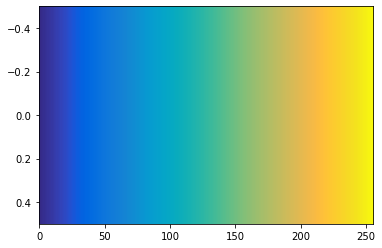

In [3]:
# Add colormap parlula

from matplotlib.colors import LinearSegmentedColormap

cm_data = [[0.2081, 0.1663, 0.5292], [0.2116238095, 0.1897809524, 0.5776761905], 
 [0.212252381, 0.2137714286, 0.6269714286], [0.2081, 0.2386, 0.6770857143], 
 [0.1959047619, 0.2644571429, 0.7279], [0.1707285714, 0.2919380952, 
  0.779247619], [0.1252714286, 0.3242428571, 0.8302714286], 
 [0.0591333333, 0.3598333333, 0.8683333333], [0.0116952381, 0.3875095238, 
  0.8819571429], [0.0059571429, 0.4086142857, 0.8828428571], 
 [0.0165142857, 0.4266, 0.8786333333], [0.032852381, 0.4430428571, 
  0.8719571429], [0.0498142857, 0.4585714286, 0.8640571429], 
 [0.0629333333, 0.4736904762, 0.8554380952], [0.0722666667, 0.4886666667, 
  0.8467], [0.0779428571, 0.5039857143, 0.8383714286], 
 [0.079347619, 0.5200238095, 0.8311809524], [0.0749428571, 0.5375428571, 
  0.8262714286], [0.0640571429, 0.5569857143, 0.8239571429], 
 [0.0487714286, 0.5772238095, 0.8228285714], [0.0343428571, 0.5965809524, 
  0.819852381], [0.0265, 0.6137, 0.8135], [0.0238904762, 0.6286619048, 
  0.8037619048], [0.0230904762, 0.6417857143, 0.7912666667], 
 [0.0227714286, 0.6534857143, 0.7767571429], [0.0266619048, 0.6641952381, 
  0.7607190476], [0.0383714286, 0.6742714286, 0.743552381], 
 [0.0589714286, 0.6837571429, 0.7253857143], 
 [0.0843, 0.6928333333, 0.7061666667], [0.1132952381, 0.7015, 0.6858571429], 
 [0.1452714286, 0.7097571429, 0.6646285714], [0.1801333333, 0.7176571429, 
  0.6424333333], [0.2178285714, 0.7250428571, 0.6192619048], 
 [0.2586428571, 0.7317142857, 0.5954285714], [0.3021714286, 0.7376047619, 
  0.5711857143], [0.3481666667, 0.7424333333, 0.5472666667], 
 [0.3952571429, 0.7459, 0.5244428571], [0.4420095238, 0.7480809524, 
  0.5033142857], [0.4871238095, 0.7490619048, 0.4839761905], 
 [0.5300285714, 0.7491142857, 0.4661142857], [0.5708571429, 0.7485190476, 
  0.4493904762], [0.609852381, 0.7473142857, 0.4336857143], 
 [0.6473, 0.7456, 0.4188], [0.6834190476, 0.7434761905, 0.4044333333], 
 [0.7184095238, 0.7411333333, 0.3904761905], 
 [0.7524857143, 0.7384, 0.3768142857], [0.7858428571, 0.7355666667, 
  0.3632714286], [0.8185047619, 0.7327333333, 0.3497904762], 
 [0.8506571429, 0.7299, 0.3360285714], [0.8824333333, 0.7274333333, 0.3217], 
 [0.9139333333, 0.7257857143, 0.3062761905], [0.9449571429, 0.7261142857, 
  0.2886428571], [0.9738952381, 0.7313952381, 0.266647619], 
 [0.9937714286, 0.7454571429, 0.240347619], [0.9990428571, 0.7653142857, 
  0.2164142857], [0.9955333333, 0.7860571429, 0.196652381], 
 [0.988, 0.8066, 0.1793666667], [0.9788571429, 0.8271428571, 0.1633142857], 
 [0.9697, 0.8481380952, 0.147452381], [0.9625857143, 0.8705142857, 0.1309], 
 [0.9588714286, 0.8949, 0.1132428571], [0.9598238095, 0.9218333333, 
  0.0948380952], [0.9661, 0.9514428571, 0.0755333333], 
 [0.9763, 0.9831, 0.0538]]

parula_map = LinearSegmentedColormap.from_list('parula', cm_data)
# For use of "viscm view"
test_cm = parula_map

if __name__ == "__main__":
    import matplotlib.pyplot as plt
    import numpy as np

    try:
        from viscm import viscm
        viscm(parula_map)
    except ImportError:
        print("viscm not found, falling back on simple display")
        plt.imshow(np.linspace(0, 100, 256)[None, :], aspect='auto',
                   cmap=parula_map)
    plt.show()

In [950]:
demo = pd.read_excel(join(path_data, 'Phenotypic.xlsx'), sheet_name='surf_n=211', skiprows=0)

sub_list = demo['FILE_ID']

label = demo['DX_GROUP']
site_id = demo['SITE_ID']
site_label = demo['SITE_Label']
Age = demo['AGE_AT_SCAN']
FD = demo['func_mean_fd']

ASD_index = np.where(label == 1)[0]                
TD_index = np.where(label == 2)[0]
Total_index = np.concatenate((ASD_index,TD_index)) 
sorted_idx = np.concatenate((ASD_index,TD_index), axis = 0)

site_label_sorted = np.array(site_label)[sorted_idx]
label_sorted = np.array(label)[sorted_idx]

# ROC curve from each gradient/Thresholding

In [1160]:
# accuracy, TPR, FPR order
from sklearn import metrics

def make_acc_matfile(roc_matfile, content):
    fpr_list=[]
    tpr_list=[]
    thresh_list=[]
    for i in content:
        
        data = roc_matfile
        rm_elm = np.where(np.isnan(data[i]))[1]
        data = np.delete(data[i],rm_elm, axis=1)
        fpr, tpr, thresholds = metrics.roc_curve(data[0], data[1], pos_label=1)
        fpr_list.append(fpr)
        tpr_list.append(tpr)
        thresh_list.append(thresholds)

    return fpr_list, tpr_list


def make_roc_plot(fpr_list, tpr_list, content):
    sns.set_palette('Greys')
    fig, ax = plt.subplots(figsize = [8, 7])
    for i in range(len(fpr_list)):
        label = content[i]

        if label == 'nothresh' : # Bold topk revision manually
            roc_auc = metrics.auc(fpr_list[i], tpr_list[i])
            display = metrics.RocCurveDisplay(fpr=fpr_list[i], tpr=tpr_list[i],  roc_auc=roc_auc)
            display.plot(ax=ax, name=label, lw=5, color='k')
            plt.xlabel('False Positive Rate', fontsize=30)
            plt.ylabel('True Positive Rate', fontsize=30)
            plt.xticks(fontsize = 20)
            plt.yticks(fontsize = 20)
            plt.legend(fontsize = 15, loc='lower right')


        else:
            roc_auc = metrics.auc(fpr_list[i], tpr_list[i])
            display = metrics.RocCurveDisplay(fpr=fpr_list[i], tpr=tpr_list[i],  roc_auc=roc_auc)
            display.plot(ax=ax, name = label, lw=1)  
            plt.xlabel('False Positive Rate', fontsize=30)
            plt.ylabel('True Positive Rate', fontsize=30)
            plt.xticks(fontsize = 20)
            plt.yticks(fontsize = 20)
            plt.legend(fontsize = 15, loc='lower right')


In [ ]:
mat_file = 'Gradient1_pearson_MeanHar_ROCscore'
roc_matfile = sc.io.loadmat(join(path_mat, 'review/ROC', f'{mat_file}.mat'))

content = ['top01', 'top03', 'top05', 'top10', 'top25', 'top50', 'nothresh']

fpr_list, tpr_list = make_acc_matfile(roc_matfile, content)
make_roc_plot(fpr_list, tpr_list, content)
plt.title('Gradient 1 Train', fontsize=30)

In [ ]:
mat_file = 'Gradient2_pearson_MeanHar_ROCscore'
roc_matfile = sc.io.loadmat(join(path_mat, 'review/ROC', f'{mat_file}.mat'))

content = ['top01', 'top03', 'top05', 'top10', 'top25', 'top50', 'nothresh']

fpr_list, tpr_list = make_acc_matfile(roc_matfile, content)
make_roc_plot(fpr_list, tpr_list, content)
plt.title('Gradient 2 Train', fontsize=30)

In [ ]:
mat_file = 'Gradient3_pearson_MeanHar_ROCscore'
roc_matfile = sc.io.loadmat(join(path_mat, 'review/ROC', f'{mat_file}.mat'))

content = ['top01', 'top03', 'top05', 'top10', 'top25', 'top50', 'nothresh']

fpr_list, tpr_list = make_acc_matfile(roc_matfile, content)

make_roc_plot(fpr_list, tpr_list, content)
plt.title('Gradient 3 Train', fontsize=30)

In [ ]:
mat_file = 'Gradient123_pearson_MeanHar_ROCscore'
roc_matfile = sc.io.loadmat(join(path_mat, 'review/ROC', f'{mat_file}.mat'))

content = ['top01', 'top03', 'top05', 'top10', 'top25', 'top50', 'nothresh']

fpr_list, tpr_list = make_acc_matfile(roc_matfile, content)
make_roc_plot(fpr_list, tpr_list, content)
plt.title('Gradient 123 Train', fontsize=30)

In [ ]:
mat_file = 'Gradient1_pearson_MeanHar_ROCscore_ABD1'
roc_matfile = sc.io.loadmat(join(path_mat, 'review/ROC',f'{mat_file}.mat'))

content = ['top01', 'top03', 'top05', 'top10', 'top25', 'top50', 'nothresh']

fpr_list, tpr_list = make_acc_matfile(roc_matfile, content)
make_roc_plot(fpr_list, tpr_list, content)
plt.title('Gradient 1 Valid', fontsize=30)

In [ ]:
mat_file = 'Gradient2_pearson_MeanHar_ROCscore_ABD1'
roc_matfile = sc.io.loadmat(join(path_mat, 'review/ROC', f'{mat_file}.mat'))

content = ['top01', 'top03', 'top05', 'top10', 'top25', 'top50', 'nothresh']

fpr_list, tpr_list = make_acc_matfile(roc_matfile, content)
make_roc_plot(fpr_list, tpr_list, content)
plt.title('Gradient 2 Valid', fontsize=30)

In [ ]:
mat_file = 'Gradient3_pearson_MeanHar_ROCscore_ABD1'
roc_matfile = sc.io.loadmat(join(path_mat, 'review/ROC', f'{mat_file}.mat'))

content = ['top01', 'top03', 'top05', 'top10', 'top25', 'top50', 'nothresh']

fpr_list, tpr_list = make_acc_matfile(roc_matfile, content)
make_roc_plot(fpr_list, tpr_list, content)
plt.title('Gradient 3 Valid', fontsize=30)

In [ ]:
mat_file = 'Gradient123_pearson_MeanHar_ROCscore_ABD1'
roc_matfile = sc.io.loadmat(join(path_mat, 'review/ROC', f'{mat_file}.mat'))

content = ['top01', 'top03', 'top05', 'top10', 'top25', 'top50', 'nothresh']

fpr_list, tpr_list = make_acc_matfile(roc_matfile, content)
make_roc_plot(fpr_list, tpr_list, content)
plt.title('Gradient 123 Valid', fontsize=30)

# Thresholding Accuracy Compare (Valid set)

In [ ]:
# Accuracy, Sensitivity(ASD), Specificity(TD) from FRF result
# top01, top03, top05, top10 top25 top50,  noThresh, 
# grad 1, 2 ,3, 123

# Thresholding, gradient order

X = [0, 1, 2, 3, 4, 5, 6, 7, 8]
Y = [0, 1, 2, 3, 4]

Top50_ACC_train = [73, 59, 73, 63, None] # grad 1, 2 ,3, 123
Top50_Sen_train = [71, 54, 67, 58, None]
Top50_Spec_train = [76, 65, 78, 66, None]

Top50_ACC_valid = [58, 54, 55, 50, None]
Top50_Sen_valid = [57, 53, 49.6, 59, None]
Top50_Spec_valid = [58, 55, 61, 42, None]


Grad1_ACC_train = [59, 58, 62, 69, 67, 73.4, 59, None, None] # top 01, 03, 05, 10, 25, 50, nothresh
Grad2_ACC_train = [61, 68, 59, 68, 69, 59, 64, None, None]
Grad3_ACC_train = [64, 66, 73, 76, 75, 72.6, 73, None, None]
Grad123_ACC_train = [68, 69, 73, 64, 68, 63, 83, None, None]

Grad1_ACC_valid = [44, 54, 51, 51, 46, 58, 53, None, None]
Grad2_ACC_valid = [53, 51, 55, 55, 55, 54, 44, None, None]
Grad3_ACC_valid = [47, 49, 52, 55, 54, 55, 54, None, None]
Grad123_ACC_valid = [51, 53, 54, 52, 54, 50, 55, None, None]

sns.set_palette('Greys')

# Top K performance
plt.figure(1, (20,5)) 
plt.plot(X,Grad1_ACC_train, ':o', linewidth=1, label = 'Gradient 1', markersize = 20, color = 'black')
plt.plot(X,Grad2_ACC_train, ':o', linewidth=1, label = 'Gradient 2', markersize = 20, color = 'darkgray')
plt.plot(X,Grad3_ACC_train, ':o', linewidth=1, label = 'Gradient 3', markersize = 20, color = 'silver')
plt.plot(X,Grad123_ACC_train, ':o', linewidth=1, label = 'Gradient 123', markersize = 20, color = 'dimgray')

plt.ylabel('Accuracy (%)', fontsize = 30)
plt.ylim([49, 90])
plt.yticks([55, 60, 65, 70, 75, 80, 85], fontsize = 20)
plt.xlabel('Threholding', fontsize = 30)
plt.xticks(np.arange(9), ('Top 01%', 'Top 03%', 'Top 05%', 'Top 10%', 'Top 25%', 'Top 50%', 'None', '', ''), fontsize = 20)
plt.title('Top K FRF perfomance Train', fontsize = 30)
plt.legend(loc = 'lower right', fontsize = 20)
plt.grid(True)

plt.figure(2, (20,5)) 
plt.plot(X,Grad1_ACC_valid, ':o', linewidth=1, label = 'Gradient 1', markersize = 20, color = 'black')
plt.plot(X,Grad2_ACC_valid, ':o', linewidth=1, label = 'Gradient 2', markersize = 20, color = 'darkgray')
plt.plot(X,Grad3_ACC_valid, ':o', linewidth=1, label = 'Gradient 3', markersize = 20, color = 'silver')
plt.plot(X,Grad123_ACC_valid, ':o', linewidth=1, label = 'Gradient 123', markersize = 20, color = 'dimgray')

plt.ylabel('Accuracy (%)', fontsize = 30)
plt.ylim([37, 64])
plt.yticks([40, 45, 50, 55, 60], fontsize = 20)
plt.xlabel('Threholding', fontsize = 30)
plt.xticks(np.arange(9), ('Top 01%', 'Top 03%', 'Top 05%', 'Top 10%', 'Top 25%', 'Top 50%', 'None', '', ''), fontsize = 20)
plt.title('Top K FRF perfomance Valid', fontsize = 30)
plt.legend(loc = 'lower right', fontsize = 20)
plt.grid(True)


# Top50 gradient performance
plt.figure(3, (20,5)) 
plt.plot(Y,Top50_ACC_train, ':o', linewidth=1, label = 'Accuracy', markersize = 20, color = 'black')
plt.plot(Y,Top50_Sen_train, ':o', linewidth=1, label = 'Sensitivity (ASD)', markersize = 20, color = 'dimgray')
plt.plot(Y,Top50_Spec_train, ':o', linewidth=1, label = 'Specificity (TD)', markersize = 20, color = 'silver')

plt.ylabel('Percent (%)', fontsize = 30)
plt.ylim([48, 81])
plt.yticks([50, 55, 60, 65, 70, 75, 80], fontsize = 20)
plt.xlabel('Top 50% gradients', fontsize = 30)
plt.xticks(np.arange(5), ('Gradient 1', 'Gradient 2', 'Gradient 3', 'Gradient 123', ''), fontsize = 20)
plt.title('Top 50% gradient FRF perfomance Train', fontsize = 30)
plt.legend(loc = 'lower right', fontsize = 20)
plt.grid(True)

plt.figure(4, (20,5)) 
plt.plot(Y,Top50_ACC_valid, ':o', linewidth=1, label = 'Accuracy', markersize = 20, color = 'black')
plt.plot(Y,Top50_Sen_valid, ':o', linewidth=1, label = 'Sensitivity (ASD)', markersize = 20, color = 'dimgray')
plt.plot(Y,Top50_Spec_valid, ':o', linewidth=1, label = 'Specificity (TD)', markersize = 20, color = 'silver')

plt.ylabel('Percent (%)', fontsize = 30)
plt.ylim([38, 66])
plt.yticks([40, 45, 50, 55, 60, 65], fontsize = 20)
plt.xlabel('Top 50% gradients', fontsize = 30)
plt.xticks(np.arange(5), ('Gradient 1', 'Gradient 2', 'Gradient 3', 'Gradient 123', ''), fontsize = 20)
plt.title('Top 50% gradient FRF perfomance Valid', fontsize = 30)
plt.legend(loc = 'lower right', fontsize = 20)
plt.grid(True)


In [ ]:
# Start characterize subytpe using Funtaional Random Forest result

In [ ]:
# Load reg out mat

grad_num = 1
Thresh = 'top50' # top50
ref_Har = 'Mean' # Mean 
corr = 'pearson' # pearson
split_per = 'split06'

result_type = 'reviewer' # main_result reviewer simul


if result_type == 'main_result':
    print('main_result')
    regout_mat = sc.io.loadmat(join(path_data,f'Gradient{grad_num}_Surf_{corr}_sorted_regout_{ref_Har}_har_n211_{Thresh}.mat'))

    PCs_sorted_reg_out_n211 = regout_mat['total_group_data'][:,:360]
    # plt.matshow(DMN_PCs_sorted_reg_out_n211)

    grp_ASD_PCs_reg_out = PCs_sorted_reg_out_n211[:103,:]
    grp_TD_PCs_reg_out = PCs_sorted_reg_out_n211[103:,:]

    # Load FRF subtype result
    folder = f'Gradient{grad_num}_{corr}_{ref_Har}Har_{Thresh}_1000iter_1perm_rtoz_FeaSel_output'
    FRF_outbputs_DMN_pcs = sc.io.loadmat(join(path_mat,f'{folder}/subgroup_community_assignments.mat'))

elif result_type == 'reviewer':
    # for reviewer
    print('reviewer')
    Topk='Top50'
    regout_mat = sc.io.loadmat(join(path_data,f'review/{Topk}',f'Gradient{grad_num}_Surf_{corr}_sorted_regout_{ref_Har}_har_n211_{Thresh}_{split_per}.mat')) # for reviewer _2 _3
    PCs_sorted_reg_out_n211 = regout_mat['group_data_total'][:,:360] # group_data_total group_data1_total group_data2_total
    label = regout_mat['group_data_total'][:,360] # # group_data1_total group_data2_total
    grp_ASD_PCs_reg_out = PCs_sorted_reg_out_n211[np.where(label==1)[0]]
    grp_TD_PCs_reg_out = PCs_sorted_reg_out_n211[np.where(label==2)[0]]
    folder = f'Gradient{grad_num}_{corr}_{ref_Har}Har_{Thresh}_100iter_1perm_rtoz_FeaSel_{split_per}_valid_Main_output' # _output _valid_Main_output _valid_ABD1_output _valid_ABD2_output
    FRF_outbputs_DMN_pcs = sc.io.loadmat(join(path_mat,f'review/{Topk}_main',f'{folder}/subgroup_community_assignments.mat'))
    
    ASD_label_idx = np.where(label==1)[0]
    TD_label_idx = np.where(label==2)[0]
    
elif result_type == 'simul':
    print('simul')
    Simul_folder = 'Simul_2_35'
    regout_mat = sc.io.loadmat(join(path_data,f'review/{Simul_folder}/Gradient_Simul_split06.mat'))
    PCs_sorted_reg_out_n211 = regout_mat['group_data_total'][:,:6]
    label = regout_mat['group_data_total'][:,6]
    grp_ASD_PCs_reg_out = PCs_sorted_reg_out_n211[np.where(label==1)[0]]
    grp_TD_PCs_reg_out = PCs_sorted_reg_out_n211[np.where(label==2)[0]]
    folder = f'Gradient_Simul_100iter_1perm_{split_per}_valid_Main_output' # _output _valid_Main_output _valid_ABD1_output
    FRF_outbputs_DMN_pcs = sc.io.loadmat(join(path_mat,f'review/{Simul_folder}',f'{folder}/subgroup_community_assignments.mat'))

# subgroup_order
subgroup_order = []

for i in range(len(PCs_sorted_reg_out_n211)):
    subgroup_order.append(FRF_outbputs_DMN_pcs['subgroup_community_assignments'][i][0][0])
    
ASD1 = np.where(np.array(subgroup_order)=='G1_1')[0].shape[0]
ASD2 = np.where(np.array(subgroup_order)=='G1_2')[0].shape[0]
ASD3 = np.where(np.array(subgroup_order)=='G1_3')[0].shape[0]
ASD4 = np.where(np.array(subgroup_order)=='G1_4')[0].shape[0]
ASD5 = np.where(np.array(subgroup_order)=='G1_5')[0].shape[0]
ASD6 = np.where(np.array(subgroup_order)=='G1_6')[0].shape[0]

TD1 = np.where(np.array(subgroup_order)=='G2_1')[0].shape[0]
TD2 = np.where(np.array(subgroup_order)=='G2_2')[0].shape[0]
TD3 = np.where(np.array(subgroup_order)=='G2_3')[0].shape[0]
TD4 = np.where(np.array(subgroup_order)=='G2_4')[0].shape[0]
TD5 = np.where(np.array(subgroup_order)=='G2_5')[0].shape[0]
TD6 = np.where(np.array(subgroup_order)=='G2_6')[0].shape[0]
TD7 = np.where(np.array(subgroup_order)=='G2_7')[0].shape[0]

# Assign subtype idx
ASD_DMN_pc_sub1_idx = np.array(FRF_outbputs_DMN_pcs['subgroup_sorting_orders'][0][0].reshape(-1,),dtype='int64')[ :ASD1]-1
ASD_DMN_pc_sub2_idx = np.array(FRF_outbputs_DMN_pcs['subgroup_sorting_orders'][0][0].reshape(-1,),dtype='int64')[ASD1 : ASD1+ASD2]-1
ASD_DMN_pc_sub3_idx = np.array(FRF_outbputs_DMN_pcs['subgroup_sorting_orders'][0][0].reshape(-1,),dtype='int64')[ASD1+ASD2 : ASD1+ASD2+ASD3]-1
ASD_DMN_pc_sub4_idx = np.array(FRF_outbputs_DMN_pcs['subgroup_sorting_orders'][0][0].reshape(-1,),dtype='int64')[ASD1+ASD2+ASD3 : ASD1+ASD2+ASD3+ASD4]-1   
ASD_DMN_pc_sub5_idx = np.array(FRF_outbputs_DMN_pcs['subgroup_sorting_orders'][0][0].reshape(-1,),dtype='int64')[ASD1+ASD2+ASD3+ASD4:ASD1+ASD2+ASD3+ASD4+ASD5]-1   
# ASD_DMN_pc_sub6_idx = np.array(FRF_outbputs_DMN_pcs['subgroup_sorting_orders'][0][0].reshape(-1,),dtype='int64')[100:]-1   

TD_DMN_pc_sub1_idx = np.array(FRF_outbputs_DMN_pcs['subgroup_sorting_orders'][1][0].reshape(-1,),dtype='int64')[ :TD1]-1
TD_DMN_pc_sub2_idx = np.array(FRF_outbputs_DMN_pcs['subgroup_sorting_orders'][1][0].reshape(-1,),dtype='int64')[TD1 : TD1+TD2]-1   
TD_DMN_pc_sub3_idx = np.array(FRF_outbputs_DMN_pcs['subgroup_sorting_orders'][1][0].reshape(-1,),dtype='int64')[TD1+TD2 : TD1+TD2+TD3]-1  
TD_DMN_pc_sub4_idx = np.array(FRF_outbputs_DMN_pcs['subgroup_sorting_orders'][1][0].reshape(-1,),dtype='int64')[TD1+TD2+TD3 : TD1+TD2+TD3+TD4]-1  
TD_DMN_pc_sub5_idx = np.array(FRF_outbputs_DMN_pcs['subgroup_sorting_orders'][1][0].reshape(-1,),dtype='int64')[TD1+TD2+TD3+TD4 :]-1    
# TD_DMN_pc_sub6_idx = np.array(FRF_outbputs_DMN_pcs['subgroup_sorting_orders'][1][0].reshape(-1,),dtype='int64')[:]-1    

ASD_DMN_pc_sub1 = grp_ASD_PCs_reg_out[ASD_DMN_pc_sub1_idx,:]
ASD_DMN_pc_sub2 = grp_ASD_PCs_reg_out[ASD_DMN_pc_sub2_idx,:]
ASD_DMN_pc_sub3 = grp_ASD_PCs_reg_out[ASD_DMN_pc_sub3_idx,:]
ASD_DMN_pc_sub4 = grp_ASD_PCs_reg_out[ASD_DMN_pc_sub4_idx,:]
ASD_DMN_pc_sub5 = grp_ASD_PCs_reg_out[ASD_DMN_pc_sub5_idx,:]

TD_DMN_pc_sub1 = grp_TD_PCs_reg_out[TD_DMN_pc_sub1_idx,:]
TD_DMN_pc_sub2 = grp_TD_PCs_reg_out[TD_DMN_pc_sub2_idx,:]
TD_DMN_pc_sub3 = grp_TD_PCs_reg_out[TD_DMN_pc_sub3_idx,:]
TD_DMN_pc_sub4 = grp_TD_PCs_reg_out[TD_DMN_pc_sub4_idx,:]
TD_DMN_pc_sub5 = grp_TD_PCs_reg_out[TD_DMN_pc_sub5_idx,:]
# TD_DMN_pc_sub6 = grp_TD_PCs_reg_out[TD_DMN_pc_sub6_idx,:]

print(ASD_DMN_pc_sub1.shape)
print(ASD_DMN_pc_sub2.shape)
print(ASD_DMN_pc_sub3.shape)
print(ASD_DMN_pc_sub4.shape)
print(ASD_DMN_pc_sub5.shape)
print(' ')
print(TD_DMN_pc_sub1.shape)
print(TD_DMN_pc_sub2.shape)
print(TD_DMN_pc_sub3.shape)
print(TD_DMN_pc_sub4.shape)
print(TD_DMN_pc_sub5.shape)
# print(TD_DMN_pc_sub6.shape)

In [602]:
split_06_idx = np.load(join(path_data,'review','Top50_other','Gradient1_split_06_idx.npy'), allow_pickle=True).item()['split_06_idx'] # group_data1_total
split_06_idx_rm = np.load(join(path_data,'review','Top50_other','Gradient1_split_06_idx.npy'), allow_pickle=True).item()['split_06_idx_rm'] # group_data2_total, valid ABD1

In [1876]:
# ADOS_Score assignment

label = np.array(demo['DX_GROUP'])

ADOS_Total = np.nan_to_num(np.array(demo['ADOS_TOTAL']), nan = -1e-16) 
ADOS_Total = np.where(ADOS_Total == -9999, -1e-16, ADOS_Total)
ADOS_Total
ADOS_Total_sorted = ADOS_Total[sorted_idx]

ADOS_comm = np.nan_to_num(np.array(demo['ADOS_COMM']), nan = -1e-16)
ADOS_comm = np.where(ADOS_comm == -9999, -1e-16, ADOS_comm)
ADOS_comm_sorted = ADOS_comm[sorted_idx]

ADOS_social =  np.nan_to_num(np.array(demo['ADOS_SOCIAL']), nan = -1e-16)
ADOS_social = np.where(ADOS_social == -9999, -1e-16, ADOS_social)
ADOS_social_sorted = ADOS_social[sorted_idx]

ADOS_behav =  np.nan_to_num(np.array(demo['ADOS_STEREO_BEHAV']), nan = -1e-16)
ADOS_behav = np.where(ADOS_behav == -9999, -1e-16, ADOS_behav)
ADOS_behav_sorted = ADOS_behav[sorted_idx]

SRS = np.nan_to_num(np.array(demo['SRS_RAW_TOTAL']), nan = -2) 
SRS = np.where(SRS == -9999, -1e-16, SRS)
SRS_sorted = SRS[sorted_idx]

age_sorted = np.array(Age)[sorted_idx]
iq_sorted = np.array(IQ)[sorted_idx]

x = ADOS_Total_sorted
y = ADOS_comm_sorted
z = ADOS_social_sorted
t = ADOS_behav_sorted
u = SRS_sorted
v = age_sorted
w = iq_sorted

idx1 = ASD_DMN_pc_sub1_idx
idx2 = ASD_DMN_pc_sub2_idx
idx3 = ASD_DMN_pc_sub3_idx
idx4 = ASD_DMN_pc_sub4_idx
idx5 = ASD_DMN_pc_sub5_idx

In [ ]:
import statsmodels as sm
from statsmodels.stats.multitest import multipletests

ADOS_Total = []
ADOS_Comm = []
ADOS_Social = []
ADOS_Behav = []
SRS = []
age = []
iq = []

idx_list1 = [idx1, idx1, idx2]
idx_list2 = [idx2, idx3, idx3]

for i in range(3):
    a = idx_list1[i] # idx1 idx1 idx2
    b = idx_list2[i] # idx2 idx3 idx3

    [s_0,p_0] = sc.stats.ranksums(x[a][x[a]>=0], x[b][x[b]>=0])
    [s_1,p_1] = sc.stats.ranksums(y[a][y[a]>=0], y[b][y[b]>=0]) 
    [s_2,p_2] = sc.stats.ranksums(z[a][z[a]>=0], z[b][z[b]>=0]) 
    [s_3,p_3] = sc.stats.ranksums(t[a][t[a]>=0], t[b][t[b]>=0]) 
    [s_4,p_4] = sc.stats.ranksums(u[a][u[a]>=0], u[b][u[b]>=0]) 
    [s_5,p_5] = sc.stats.ranksums(v[a][v[a]>=0], v[b][v[b]>=0]) 
    [s_6,p_6] = sc.stats.ranksums(w[a][w[a]>=0], w[b][w[b]>=0]) 

    p_0_fdr = sm.stats.multitest.multipletests(p_0,alpha=0.05,method='fdr_bh')
    p_1_fdr = sm.stats.multitest.multipletests(p_1,alpha=0.05,method='fdr_bh')
    p_2_fdr = sm.stats.multitest.multipletests(p_2,alpha=0.05,method='fdr_bh')
    p_3_fdr = sm.stats.multitest.multipletests(p_3,alpha=0.05,method='fdr_bh')
    p_4_fdr = sm.stats.multitest.multipletests(p_4,alpha=0.05,method='fdr_bh')
    p_5_fdr = sm.stats.multitest.multipletests(p_5,alpha=0.05,method='fdr_bh')
    p_6_fdr = sm.stats.multitest.multipletests(p_6,alpha=0.05,method='fdr_bh')

    ADOS_Total.append(p_0_fdr[1][0])
    ADOS_Comm.append(p_1_fdr[1][0])
    ADOS_Social.append(p_2_fdr[1][0])
    ADOS_Behav.append(p_3_fdr[1][0])
    SRS.append(p_4_fdr[1][0])
    age.append(p_5_fdr[1][0])
    iq.append(p_6_fdr[1][0])

result = {'ADOS_Total' : [np.round(i,4) for i in ADOS_Total], 
          'ADOS_Comm' : [np.round(i,4) for i in ADOS_Comm], 
          'ADOS_Social' : [np.round(i,4) for i in ADOS_Social],
          'ADOS_Behav' : [np.round(i,4) for i in ADOS_Behav], 
          'SRS' : [np.round(i,4) for i in SRS],
          'Age' : [np.round(i,4) for i in age],
          'IQ'  : [np.round(i,4) for i in iq]}

[f_age,p_age] = sc.stats.f_oneway(np.array(v)[idx1], np.array(v)[idx2], np.array(v)[idx3])
[f_iq,p_iq] = sc.stats.f_oneway(np.array(w)[idx1], np.array(w)[idx2], np.array(w)[idx3])

for key, val in result.items():
    print(f'{key}    :    {val}')    
    
print(f'Age F : {np.round(f_age,3)}, p : {np.round(p_age,3)}')
print(f'IQ F : {np.round(f_iq,3)}, p : {np.round(p_iq,3)}')

In [ ]:
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

FRF_subtype_label = np.zeros(len(ASD_label_idx))
FRF_subtype_label[:] = np.nan
FRF_subtype_label[idx1] =1
FRF_subtype_label[idx2] =2
FRF_subtype_label[idx3] =3
# FRF_subtype_label[idx4] =4
# FRF_subtype_label[idx5] =5
FRF_subtype_label

# y = ADOS_social_sorted # ADOS_Total_sorted ADOS_comm_sorted ADOS_social_sorted ADOS_behav_sorted SRS_sorted 

score_name = ['ADOS Total','ADOS Communication','ADOS Social','ADOS Behavior', 'SRS', 'Age', 'IQ']


for i, score in enumerate([ADOS_Total_sorted, ADOS_comm_sorted, ADOS_social_sorted, ADOS_behav_sorted, SRS_sorted, age_sorted, iq_sorted]):

    df = DataFrame([score[:len(ASD_label_idx)][score[:len(ASD_label_idx)]>=0], FRF_subtype_label[[score[:len(ASD_label_idx)]>=0]]]) # cluster_labels[ADOS_Total_idx_sorted] SRS_exist_idx_sorted
    df = df.T
    df.columns = [score_name[i],'ASD Subtype']

    plt.figure(figsize = (7,7))
    sns.set(style = 'whitegrid', font_scale=2.5)
    sns.boxplot(x = 'ASD Subtype' , y = df.columns[0], data = df, palette = 'gist_yarg', width=0.5)
    sns.swarmplot(x = 'ASD Subtype' , y = df.columns[0], data = df, color = 'k', size = 4)
    plt.xticks([0,1,2],['ASD 1','ASD 2', 'ASD 3'], fontsize=40)
    plt.xlabel('Subtype', fontsize=40)
    plt.ylabel(score_name[i], fontsize=40)
#     plt.ylim(0,10)
#     plt.yticks([2,4,6,8])

In [ ]:
import seaborn as sns

FRF_subtype_label = np.zeros(103)
FRF_subtype_label[:] = np.nan
# FRF_subtype_label[idx1] =1
# FRF_subtype_label[idx2] =2
# FRF_subtype_label[idx3] =3
FRF_subtype_label[idx4] =4
FRF_subtype_label[idx5] =5
FRF_subtype_label

# y = ADOS_social_sorted # ADOS_Total_sorted ADOS_comm_sorted ADOS_social_sorted ADOS_behav_sorted SRS_sorted 

score_name = ['ADOS Total','ADOS Communication','ADOS Social','ADOS Behavior', 'SRS']

for i, score in enumerate([ADOS_Total_sorted, ADOS_comm_sorted, ADOS_social_sorted, ADOS_behav_sorted, SRS_sorted]):

    df = DataFrame([score[:103][score[:103]>0], FRF_subtype_label[[score[:103]>0]]]) # cluster_labels[ADOS_Total_idx_sorted] SRS_exist_idx_sorted
    df = df.T
    df.columns = [score_name[i],'ASD Subtype']

    plt.figure(figsize = (7,7))
    sns.set(style = 'whitegrid', font_scale=2.5)
#     sns.boxplot(x = 'ASD Subtype' , y = df.columns[0], data = df, palette = 'gist_yarg', width=0.5)
    sns.swarmplot(x = 'ASD Subtype' , y = df.columns[0], data = df, color = 'k', size = 10)
    plt.xticks([0],['ASD 4'], fontsize = 40)
    plt.xlabel('Subtype', fontsize = 40)
    plt.ylabel(score_name[i], fontsize = 40)


In [ ]:
# ADOS Calibration score

demo_cali = pd.read_excel(join(path_data, 'abide_abideI_calibration.xlsx'), sheet_name='n=211', skiprows=0)

FileID_cali = demo_cali['ID3']
ADOS_Total_cali = demo_cali['CSS_Final']

score = []
for i in sub_list:
    score.append(ADOS_Total_cali[np.where(FileID_cali == i)[0][0]])
    
score = np.array(score)

y = score[ASD_index]

df = DataFrame([y[:103][y[:103]>0], FRF_subtype_label[[y[:103]>0]]]) # cluster_labels[ADOS_Total_idx_sorted] SRS_exist_idx_sorted
df = df.T
df.columns = ['ADOS Total Calibration','ASD Subtype']

plt.figure(1,(7,7))
sns.set(style = 'whitegrid', font_scale=2.5)
sns.boxplot(x = 'ASD Subtype' , y = df.columns[0], data = df, palette = 'gist_yarg', width=0.5)
sns.swarmplot(x = 'ASD Subtype' , y = df.columns[0], data = df, color = 'k', size = 4)


In [459]:
# save ABD1 symptom severity score

ABD1_Score = DataFrame([ADOS_Total_sorted[:103], ADOS_comm_sorted[:103], ADOS_social_sorted[:103], ADOS_behav_sorted[:103], SRS_sorted[:103], FRF_subtype_label[:103]]).T
ABD1_Score.columns = ['ADOS Total','ADOS Communication','ADOS Social','ADOS Behavior','SRS','ASD Subtype']
ABD1_Score
# ABD1_Score.to_excel(join(path_data,'ABD1_Score_revision.xlsx'), sheet_name = 'Sheet1', header = True)

# Statistical analysis

In [1605]:
#ttest
def subtype_ranksum(a,b, whole_region=False, print_show=True):
    import statsmodels as sm
    from statsmodels.stats.multitest import multipletests
    
    input_a = a # [X, Y, Z, X, X, Y, W]
    input_b = b # [S, S, S, Y, Z, Z, R]

    s_1 = []
    p_1 = []

    for col in range(input_a.shape[1]):
        [s,p] = sc.stats.ranksums(input_a[:,col],input_b[:,col])
        s_1.append(s)
        p_1.append(p)

    s_1 = np.array(s_1)
    p_1 = np.array(p_1)

    # Calculate Effect size r
    effect_r = s_1/np.sqrt(len(input_a)+len(input_b))

    p_1_fdr_05 = sm.stats.multitest.multipletests(p_1,alpha=0.05,method='fdr_bh')
    p_1_fdr_01 = sm.stats.multitest.multipletests(p_1,alpha=0.01,method='fdr_bh')
    p_1_fdr_001 = sm.stats.multitest.multipletests(p_1,alpha=0.001,method='fdr_bh')
    
    if print_show:
        print('FDR uncorrected : ', np.where(p_1 <0.05)[0], np.where(p_1 <0.05)[0].shape )
        print('')
        print(np.where(p_1_fdr_05[0]==True),'\n', np.where(p_1_fdr_05[0]==True)[0].shape)
        print('FDR 0.05 : ', p_1_fdr_05[1][np.where(p_1_fdr_05[0]==True)[0]])
        print('')
    
    # print('FDR 0.05 : ', p_1_fdr_05[1][np.where(p_1_fdr_05[0]==True)[0]])
#     print('')
#     print(np.where(p_1_fdr_01[0]==True),'\n', np.where(p_1_fdr_01[0]==True)[0].shape)
#     # print('FDR 0.01 : ', p_1_fdr_01[1][np.where(p_1_fdr_01[0]==True)[0]])
#     print('')
#     print(np.where(p_1_fdr_001[0]==True),'\n', np.where(p_1_fdr_001[0]==True)[0].shape)
#     # print('FDR 0.001 : ', p_1_fdr_001[1][np.where(p_1_fdr_001[0]==True)[0]])

    sign_idx = np.where(p_1_fdr_05[0]==True)[0] # p_1_fdr_05[0]==True p_1<0.05
    sign_idx_uncorr = np.where(p_1 <0.05)[0]

    ttest_tval = np.zeros(360)

    input_idx = sign_idx 

    ttest_tval[input_idx] = effect_r[input_idx] 

    if whole_region:
        return effect_r
    else:
        return ttest_tval, sign_idx, p_1_fdr_05[1]

# Anova
def subtype_kruskal(a,b,c, whole_region=False, print_show=True):
    import statsmodels as sm
    from statsmodels.stats.multitest import multipletests
    
    input_a = a
    input_b = b
    input_c = c

    f_1 = []
    p_1 = []
    for col in range(input_a.shape[1]):
        [f,p] = sc.stats.kruskal(input_a[:,col], input_b[:,col], input_c[:,col])
        f_1.append(f)
        p_1.append(p)

    f_1 = np.array(f_1)
    p_1 = np.array(p_1)

    # Caculate effect size eps_squared
    grp_num = len([input_a, input_b, input_c])
    data_num = input_a.shape[0]+input_b.shape[0]+input_c.shape[0]
    eps_squared = (f_1-grp_num+1)/(data_num-grp_num)
    
    if print_show:
        print('Subject num : ', input_a.shape[0], input_b.shape[0], input_c.shape[0])

    p_1_fdr = sm.stats.multitest.multipletests(p_1,alpha=0.05,method='fdr_bh')
    
    if print_show:
        print(np.where(p_1_fdr[0]==True),'\n', np.where(p_1_fdr[0]==True)[0].shape)

    sign_idx = np.where(p_1_fdr[0]==True)[0] # p_1_fdr[0]==True p_1 < 0.05
    sign_idx_uncorr = np.where(p_1 <0.05)[0]

    ANOVA_fval = np.zeros(360)
#     ANOVA_fval[:] = 0.5

    input_idx =  sign_idx

    ANOVA_fval[input_idx] = eps_squared[input_idx] # cohens_f f_1 eps_squared
    
    if whole_region:
        return eps_squared
    else:
        return ANOVA_fval, sign_idx, p_1_fdr[1]

# Prepare visualization
def ROI_visualization(input_stat,stats = 'Ttest'):

    import vtk

    from vtk import vtkPolyDataNormals

    from brainspace.mesh.mesh_io import read_surface
    from brainspace.mesh.mesh_operations import combine_surfaces
    from brainspace.utils.parcellation import reduce_by_labels
    from brainspace.vtk_interface import wrap_vtk, serial_connect

    template_path = join(atlas_path, "MMP")
    template_L = "L.very_inflated_MSMAll.10k_fs_LR.surf.gii" # S900.L.midthickness_MSMAll.10k_fs_LR.surf.gii # L.very_inflated_MSMAll.10k_fs_LR.surf.gii
    template_R = "R.very_inflated_MSMAll.10k_fs_LR.surf.gii" # S900.R.midthickness_MSMAll.10k_fs_LR.surf.gii # R.very_inflated_MSMAll.10k_fs_LR.surf.gii

    surfs = [None] * 2
    
    surfs[0] = read_surface(join(template_path,template_L)) # Z:/hschoi/backup/hschoi/template/MMP/S900.L.midthickness_MSMAll.10k_fs_LR.surf.gii
    nf = wrap_vtk(vtkPolyDataNormals, splitting=False, featureAngle=0.1)
    surf_lh = serial_connect(surfs[0], nf)

    surfs[1] = read_surface(join(template_path,template_R)) # Z:/hschoi/backup/hschoi/template/MMP/S900.R.midthickness_MSMAll.10k_fs_LR.surf.gii
    nf = wrap_vtk(vtkPolyDataNormals, splitting=False, featureAngle=0.1)
    surf_rh = serial_connect(surfs[1], nf)

    # Visualization

    from brainspace.datasets import load_group_fc, load_parcellation, load_conte69
    from brainspace.gradient import GradientMaps
    from brainspace.plotting import plot_hemispheres
    from brainspace.utils.parcellation import map_to_labels

    atlas = np.load(join(template_path, "MMP.10k_fs_LR.npy"))
    labeling = atlas
    conn_matrix = input_stat 
    mask = labeling != 0

    grad = map_to_labels(conn_matrix, labeling, mask=mask, fill=np.nan) # fill = np.nan fill = 0

    if stats == 'ANOVA':
        plot_hemispheres(surf_lh, surf_rh, array_name=grad, size=(1300, 300),
                         color_bar=True, cmap='Reds', zoom=1.25, nan_color=(0,0,0,1) ,color_range = (0,0.3) , view = 'dorsal'  ) 
                                                                                                                         
    elif stats == 'Ttest':
        plot_hemispheres(surf_lh, surf_rh, array_name=grad, size=(1300, 300),
                         color_bar=True, cmap='seismic', zoom=1.25, nan_color=(0,0,0,1) ,color_range = (-1,1)   ) # ventral dorsal
        
    elif stats == 'Hetero':
        plot_hemispheres(surf_lh, surf_rh, array_name=grad, size=(1300, 300),
                         color_bar=True, cmap='Blues', zoom=1.25, nan_color=(0,0,0,1) ,color_range = (0,0.2)   )
                                                                                                                     

In [ ]:
# ttest
X = ASD_DMN_pc_sub1 
Y = ASD_DMN_pc_sub2
Z = ASD_DMN_pc_sub3
W = TD_DMN_pc_sub1
R = TD_DMN_pc_sub2 
V = TD_DMN_pc_sub3

S = np.concatenate((W,R,V))
U = np.concatenate((X,Y,Z))

print('T-test')
print('sub1')
effect_r_ASD1_TD, ASD1_TD_idx, ASD1_TD_p = subtype_ranksum(X,S, whole_region=False, print_show=True)
print('sub2')
effect_r_ASD2_TD, ASD2_TD_idx, ASD2_TD_p = subtype_ranksum(Y,S, whole_region=False, print_show=True)
print('sub3')
effect_r_ASD3_TD, ASD3_TD_idx, ASD3_TD_p = subtype_ranksum(Z,S, whole_region=False, print_show=True)
print('sub12')
effect_r_ASD12, ASD12_idx, ASD12_p = subtype_ranksum(X,Y, whole_region=False, print_show=True)
print('sub13')
effect_r_ASD13, ASD13_idx, ASD13_p = subtype_ranksum(X,Z, whole_region=False, print_show=True)
print('sub23')
effect_r_ASD23, ASD23_idx, ASD23_p = subtype_ranksum(Y,Z, whole_region=False, print_show=True)
print('TD12')
effect_r_TD12, TD12_idx, TD12_p = subtype_ranksum(W,R, whole_region=False, print_show=True)
print('TD13')
effect_r_TD13, TD13_idx, TD13_p = subtype_ranksum(W,V)
print('TD23')
effect_r_TD23, TD23_idx, TD23_p = subtype_ranksum(R,V)

print('')
print('ANOVA')
ASD123_eta, ASD123_idx, ASD123_p = subtype_kruskal(X,Y,Z, whole_region=False, print_show=True)
TD123_eta, TD123_idx, TD123_p = subtype_kruskal(W,R,V, whole_region=False, print_show=True)

In [1081]:
MMP_label = np.load(join(atlas_path,'MMP','MMP_label.npy'))
# MMP_label

def MMP_section(idx, effect_r, effect_r_p):

    for i in range(MMP_label.max()+1):

        coregion = np.array(sorted(set(np.where(MMP_label==i)[0]) & set(idx)))

        if len(coregion)==0:
            L_coregion = 0
            R_coregion = 0
            L_effect_r_corregion = 0
            R_effect_r_corregion = 0
            L_p = 1
            R_p = 1
        else:
            L_coregion = coregion[coregion<180]
            R_coregion = coregion[coregion>=180]

            L_effect_r_corregion = np.round(effect_r[L_coregion].mean(),2)
            R_effect_r_corregion = np.round(effect_r[R_coregion].mean(),2)

            L_p = effect_r_p[L_coregion]
            R_p = effect_r_p[R_coregion]

        print(f'Region {i}\n', f'L : {L_coregion}, R : {R_coregion}', f'{len(coregion)}개\n', f'L : {L_effect_r_corregion}, R : {R_effect_r_corregion}', '\n', f'L : {np.round(L_p,4)}, R : {np.round(R_p,4)}')
        print('')

In [ ]:
# MMP_section(ASD2_TD_idx, effect_r_ASD2_TD, ASD2_TD_p)
MMP_section(ASD12_idx, effect_r_ASD12, ASD12_p)
# MMP_section(TD123_idx, TD123_eta, TD123_p)

# ROI Visulaization

In [1236]:
# ROI_visualization(TD123_eta, stats = 'ANOVA')
ROI_visualization(effect_r_TD23, stats = 'Ttest')

# Make file for Neurosynth

In [924]:
def file_for_Neurosynth(input_stats, effect_r, subtype_name = 'ASD1'):

    template_path = join(atlas_path, "MMP")
    atlas = np.load(join(template_path, "MMP.10k_fs_LR.npy"))

    atlas_L = atlas[:10242]
    atlas_R = atlas[10242:]

    # atlas.max()

    atlas_sig=np.zeros(len(atlas))
    for i in input_stats:                       # ASD12_idx ASD13_idx ASD23_idx ASD1_TD12_idx ASD2_TD12_idx ASD3_TD12_idx
        print(i+1, ' ', end='', flush=True)

        atlas_sig[np.where(atlas==i+1)[0]] = effect_r[i]

    atlas_sig_L = atlas_sig[:10242]
    atlas_sig_R = atlas_sig[10242:]

    np.save(join(path_gii_data, 'revision', f'L.MMP.10k.ef_r_{subtype_name}_TD.npy'),atlas_sig_L) # atlas
    np.save(join(path_gii_data, 'revision', f'R.MMP.10k.ef_r_{subtype_name}_TD.npy'),atlas_sig_R)

In [929]:
file_for_Neurosynth(ASD1_TD_idx, effect_r_ASD1_TD, subtype_name = 'ASD1')
file_for_Neurosynth(ASD2_TD_idx, effect_r_ASD2_TD, subtype_name = 'ASD2')
file_for_Neurosynth(ASD3_TD_idx, effect_r_ASD3_TD, subtype_name = 'ASD3')

199  

# ASD/TD heterogeneity analysis

In [1866]:
data = f'noaff_surf_mat_Mean_har_n211_gradients_top50.npy'
gradients = np.load(join(path_work,data))
gradients_1 = gradients[:,:,0]

ASD_gradient = gradients_1[:103,:]
TD_gradient = gradients_1[103:,:]

ASD_gradient_sub1 = ASD_gradient[ASD_DMN_pc_sub1_idx,:]
ASD_gradient_sub2 = ASD_gradient[ASD_DMN_pc_sub2_idx,:]
ASD_gradient_sub3 = ASD_gradient[ASD_DMN_pc_sub3_idx,:]

TD_gradient_sub1 = TD_gradient[TD_DMN_pc_sub1_idx,:]
TD_gradient_sub2 = TD_gradient[TD_DMN_pc_sub2_idx,:]
TD_gradient_sub3 = TD_gradient[TD_DMN_pc_sub3_idx,:]

In [ ]:
import random

X = ASD_gradient_sub1 #ASD_DMN_pc_sub1 ASD_gradient_sub1
Y = ASD_gradient_sub2 #ASD_DMN_pc_sub2 ASD_gradient_sub2
Z = ASD_gradient_sub3 #ASD_DMN_pc_sub3 ASD_gradient_sub3
W = TD_gradient_sub1 #TD_DMN_pc_sub1 TD_gradient_sub1
R = TD_gradient_sub2 #TD_DMN_pc_sub2 TD_gradient_sub2
V = TD_gradient_sub3 #TD_DMN_pc_sub3 TD_gradient_sub3

# ASD_eta_list=[]
# TD_eta_list=[]

ASD_mean_list=[]
ASD_std_list=[]
TD_mean_list=[]
TD_std_list=[]

for i in range(100):
    print(i, ' ', end='', flush=True)

    X_boot = np.array(random.sample(X.tolist(),int(len(X)*0.9)))
    Y_boot = np.array(random.sample(Y.tolist(),int(len(Y)*0.9)))
    Z_boot = np.array(random.sample(Z.tolist(),int(len(Z)*0.9)))
    W_boot = np.array(random.sample(W.tolist(),int(len(W)*0.9)))
    R_boot = np.array(random.sample(R.tolist(),int(len(R)*0.9)))
    V_boot = np.array(random.sample(V.tolist(),int(len(V)*0.9)))

    ASD_eta = subtype_kruskal(X_boot,Y_boot,Z_boot, whole_region=True, print_show=False)
    TD_eta = subtype_kruskal(W_boot,R_boot,V_boot, whole_region=True, print_show=False)
    
    ASD_mean = np.concatenate((X_boot, Y_boot, Z_boot), axis=0).mean(axis=0)
    ASD_std = np.concatenate((X_boot, Y_boot, Z_boot), axis=0).std(axis=0)
    TD_mean = np.concatenate((W_boot,R_boot,V_boot), axis=0).mean(axis=0)
    TD_std = np.concatenate((W_boot,R_boot,V_boot), axis=0).std(axis=0)
    
    
    ASD_eta_list.append(ASD_eta)
    TD_eta_list.append(TD_eta)
    
    ASD_mean_list.append(ASD_mean)
    ASD_std_list.append(ASD_std)
    TD_mean_list.append(TD_mean)
    TD_std_list.append(TD_std)

ASD_eta_mean = np.stack(ASD_eta_list).mean(axis=0)
ASD_eta_std = np.stack(ASD_eta_list).std(axis=0)
TD_eta_mean = np.stack(TD_eta_list).mean(axis=0)
TD_eta_std = np.stack(TD_eta_list).std(axis=0)

ASD_grad_mean = np.stack(ASD_mean_list).mean(axis=0)
ASD_var_mean = np.stack(ASD_std_list).mean(axis=0)
TD_grad_mean = np.stack(TD_mean_list).mean(axis=0)
TD_var_mean = np.stack(TD_std_list).mean(axis=0)

ASD_var_main = np.concatenate((X, Y, Z), axis=0).std(axis=0)
TD_var_main = np.concatenate((W,R,V), axis=0).std(axis=0)

In [ ]:
# ASD/TD variability (gradient std) comparison

ASDTD_idx = np.array(sorted(set(ASD123_idx) | set(TD123_idx)))

input_asd = ASD_var_main # ASD_var_main ASD_var_mean
input_td = TD_var_main # TD_var_main TD_var_mean


df_asd=pd.DataFrame(np.concatenate((input_asd.reshape(-1,1), np.zeros(len(input_asd)).reshape(-1,1)),axis=1), columns=['var','Label'])
df_td=pd.DataFrame(np.concatenate((input_td.reshape(-1,1), np.ones(len(input_td)).reshape(-1,1)),axis=1), columns=['var','Label'])
df_hetero = pd.concat([df_asd, df_td], ignore_index=True)


plt.figure(figsize = (7,7))
sns.set(style = 'whitegrid', font_scale=2.5)
sns.boxplot(x = 'Label' , y = 'var', data = df_hetero, palette = 'gist_yarg', width=0.5)
sns.swarmplot(x = 'Label' , y = 'var', data = df_hetero, color = 'k', size = 4)
plt.xlabel('Group')
plt.ylabel('Variability')
plt.xticks([0,1],['ASD','TD'])
# plt.ylim([-0.03,0.3])


t_hetero, p_hetero = sc.stats.ranksums(input_asd, input_td) # sc.stats.ranksums sc.stats.ttest_ind
print('t stattic : ', np.round(t_hetero,2))
print('p value : ', p_hetero)
f'ASD is about {np.round((input_asd/input_td).mean()*100-100,2)}% larger'

# Calculate degree centrality

In [ ]:
demo = pd.read_excel(join(path_data, 'Phenotypic.xlsx'), sheet_name='surf_n=211', skiprows=0)

sub_list = demo['FILE_ID']
label = demo['DX_GROUP']
Age = demo['AGE_AT_SCAN']
FD = demo['func_mean_fd']


ASD_index = np.where(label == 1)[0]                
TD_index = np.where(label == 2)[0]
Total_index = np.concatenate((ASD_index,TD_index)) 
sorted_idx = np.concatenate((ASD_index,TD_index), axis = 0)

file_list = np.array([glob(join(path_data,f'{workfolder}',f'{sub_list[i]}','*surf_conn_mat_Mean_har.npy')) for i in range(len(sub_list))]).reshape(-1)

from nilearn.connectome import ConnectivityMeasure, sym_matrix_to_vec, vec_to_sym_matrix
import statsmodels as sm
from statsmodels.api import GLM

list_aff = [np.load(sl) for sl in file_list]
n = len(list_aff)
list_aff_vec = [None] * n

for i, x1 in enumerate(list_aff):
    print(i,' ', end = '', flush = True)
    x1 = x1 + np.eye(len(x1))
    list_aff_vec[i] = sym_matrix_to_vec(x1, discard_diagonal=True)

# FC age/FD regression out (for DC)
list_reg_out = []

for i in range(np.array(list_aff_vec).shape[1]):
    if i%1000 == 0:
        print(i, ' ', end='', flush=True)
    a = GLM(np.array(list_aff_vec)[:,i],sm.api.add_constant(np.array([Age,FD,Age*FD]).T))
    res = a.fit()
    list_reg_out.append(res.resid_response)
    
FC_reg_out = np.array(list_reg_out).T

grp_ASD_FC_reg_out = FC_reg_out[ASD_index,:]
grp_TD_FC_reg_out = FC_reg_out[TD_index,:]
print('Finish')

surf_conn_mat_reg_out_har = [None] * n

for i, x1 in enumerate(FC_reg_out):
    print(i,' ', end = '', flush = True)
    
    x2 = vec_to_sym_matrix(x1, diagonal = np.zeros(360))
    surf_conn_mat_reg_out_har[i] = x2

for i, filename in enumerate(file_list):
    print(i)
    FileID_num = np.array(sub_list)[i]
    save_path = glob(join(path_data,f'{workfolder}',f'*{FileID_num}'))
    print(FileID_num, ' ', save_path)
      
#     np.save(join(save_path[0], 'surf_conn_mat_Age_out_Mean_har.npy'), np.array(surf_conn_mat_reg_out_har[i]))

# soft thresholding

In [127]:
# Make Individual mat

file_list = np.array([glob(join(path_data,f'{workfolder}',f'{sub_list[i]}','noaff_surf_mat_reg_out_Mean_har_top50.npy')) for i in range(len(sub_list))]).reshape(-1)

path_work = join(path_data,f'{workfolder}')

for i, x in enumerate(file_list):
    print(i, ' ', end = '' , flush = True)
    conn_mat = np.load(x)
    z_conn_mat = np.arctanh(np.nan_to_num(conn_mat, nan=0.0))
    noaff_conn_mat = gradient.compute_affinity(np.nan_to_num(z_conn_mat, nan=0.0), sparsity=0.5)
    np.save(join(path_work, x.split('\\')[-2],'noaff_surf_mat_reg_out_Mean_har_top50.npy'),noaff_conn_mat)

beta = 6
for i, x1 in enumerate(file_list):
    print(i, ' ', end = '' , flush = True)
    FileID_num = np.array(FileID)[i]
    save_path = glob(join(path_data,f'{workfolder}',f'*{FileID_num}'))
    
    conn_mat = np.load(x1)
    conn_mat = np.tanh(conn_mat) # Thresholding mat is rtoz already
    soft_thresh = np.power(((conn_mat+1)/2),beta)
    z_soft_thresh = np.arctanh(np.nan_to_num(soft_thresh, nan=0.0))
    degree = z_soft_thresh.sum(axis=0)
    
    print(FileID_num, ' ', save_path)
    np.save(join(save_path[0], 'surf_degree_pearson_reg_out_Mean_har_top50.npy'), degree)

DC=[]

for i, x1 in enumerate(file_list):
    print(i, ' ', end = '' , flush = True)
    x2 = np.load(x1)
    DC.append(x2)
    
# np.save("Z:/hschoi/backup/hschoi/1.asd.grad/data/Degree_Surf_pearson_sorted_reg_out_Mean_har_n211_top50",np.array(DC)[sorted_idx,:])

# Calculate delta gradient and DC between subtype

In [966]:
def cal_delta(left,right, name = 'degree1_TD'):

    left_data = left # grad_sub1 grad_sub2 grad_sub3 degree_sub1 degree_sub2 degree_sub3
    right_data = right
    save_name = name

    list_delta = []

    for i, x in enumerate(left_data):
        print(i)
        x = left_data[i,:]
        for j, y in enumerate(right_data):
            print(j, ' ', end = '' , flush = True)
            y = right_data[j,:]
            delta = x-y
            list_delta.append(delta)

        print('\n')
    np.save(join(path_data, 'review/Top50_main/DC',f'Delta_{save_name}_Surf_pearson_sorted_reg_out_Mean_har_n211_top50'), list_delta)

In [ ]:
gradient1 = np.load(join(path_data, 'Gradient1_Surf_pearson_sorted_regout_Mean_har_n211_top50.npy'))
degree = np.load(join(path_data, 'Degree_Surf_pearson_sorted_regout_Mean_har_n211_top50.npy')) 

gradient1_ASD = gradient1[np.where(label_sorted==1)[0],:]
gradient1_TD = gradient1[np.where(label_sorted==2)[0],:]
degree_ASD = degree[np.where(label_sorted==1)[0],:]
degree_TD = degree[np.where(label_sorted==2)[0],:]

TD_sub123_idx = np.concatenate((TD_DMN_pc_sub1_idx,TD_DMN_pc_sub2_idx,TD_DMN_pc_sub3_idx))


grad_sub1 = gradient1_ASD[ASD_DMN_pc_sub1_idx,:]
grad_sub2 = gradient1_ASD[ASD_DMN_pc_sub2_idx,:]
grad_sub3 = gradient1_ASD[ASD_DMN_pc_sub3_idx,:]
grad_TD_sub123 = gradient1_TD[TD_sub123_idx, :]

degree_sub1 = degree_ASD[ASD_DMN_pc_sub1_idx,:]
degree_sub2 = degree_ASD[ASD_DMN_pc_sub2_idx,:]
degree_sub3 = degree_ASD[ASD_DMN_pc_sub3_idx,:]
degree_TD_sub123 = degree_TD[TD_sub123_idx, :]

cal_delta(grad_sub1, grad_sub2, name = 'grad12')
cal_delta(grad_sub1, grad_sub3, name = 'grad13')
cal_delta(grad_sub2, grad_sub3, name = 'grad23')

cal_delta(grad_sub1, grad_TD_sub123, name = 'grad1_TD')
cal_delta(grad_sub2, grad_TD_sub123, name = 'grad2_TD')
cal_delta(grad_sub3, grad_TD_sub123, name = 'grad3_TD')

cal_delta(degree_sub1, degree_sub2, name = 'degree12')
cal_delta(degree_sub1, degree_sub3, name = 'degree13')
cal_delta(degree_sub2, degree_sub3, name = 'degree23')

cal_delta(degree_sub1, degree_TD_sub123, name = 'degree1_TD')
cal_delta(degree_sub2, degree_TD_sub123, name = 'degree2_TD')
cal_delta(degree_sub3, degree_TD_sub123, name = 'degree3_TD')

# Correlation between delata gradient and delta degree

In [1882]:
def plot_grad_DC_corr(input_grad,input_degree):

    input_grad = input_grad
    input_degree = input_degree
    shape = input_grad.shape[1]
    title = 'a'# x3_cortex_title

    list_r = []
    list_p = []

    for i in range(shape):
        print(i, ' ', end = '', flush = True)
        [r,p] = sc.stats.pearsonr(input_grad[:,i],input_degree[:,i])
        list_r.append(r)
        list_p.append(p)

    list_p_fdr = sm.stats.multitest.multipletests(list_p,alpha=0.05,method='fdr_bh')
    print(np.where(list_p_fdr[0]==True),'\n', np.where(list_p_fdr[0]==True)[0].shape)

    for n in [0,1]:

        plt.figure(figsize=(10,7))
        plt.xlim(input_grad[:,n].min()-0.1,input_grad[:,n].max()+0.1)

        sns.regplot(input_grad[:,n],input_degree[:,n], scatter_kws={"color": 'slategray'}, line_kws={"color":'k'})

        plt.xlabel('   Gradient', fontsize=60)
        plt.ylabel('   DC', fontsize=60)
        plt.title(f'{n+1}.  r = {round(list_r[n],3)}  FDR < {np.where(list_p[n]<0.001,0.001,round(list_p[n],2))}', fontsize=50)
        plt.grid(False)

In [ ]:
# significnat region

delta_grad12 = np.load(join(path_data, 'review/Top50_main/DC', 'Delta_grad12_Surf_pearson_sorted_reg_out_Mean_har_n211_top50.npy'))
delta_grad13 = np.load(join(path_data, 'review/Top50_main/DC', 'Delta_grad13_Surf_pearson_sorted_reg_out_Mean_har_n211_top50.npy'))
delta_grad23 = np.load(join(path_data, 'review/Top50_main/DC', 'Delta_grad23_Surf_pearson_sorted_reg_out_Mean_har_n211_top50.npy'))
delta_grad1_TD = np.load(join(path_data, 'review/Top50_main/DC', 'Delta_grad1_TD_Surf_pearson_sorted_reg_out_Mean_har_n211_top50.npy'))
delta_grad2_TD = np.load(join(path_data, 'review/Top50_main/DC', 'Delta_grad2_TD_Surf_pearson_sorted_reg_out_Mean_har_n211_top50.npy'))
delta_grad3_TD = np.load(join(path_data, 'review/Top50_main/DC', 'Delta_grad3_TD_Surf_pearson_sorted_reg_out_Mean_har_n211_top50.npy'))

delta_degree12 = np.load(join(path_data, 'review/Top50_main/DC', 'Delta_degree12_Surf_pearson_sorted_reg_out_Mean_har_n211_top50.npy'))
delta_degree13 = np.load(join(path_data, 'review/Top50_main/DC', 'Delta_degree13_Surf_pearson_sorted_reg_out_Mean_har_n211_top50.npy'))
delta_degree23 = np.load(join(path_data, 'review/Top50_main/DC', 'Delta_degree23_Surf_pearson_sorted_reg_out_Mean_har_n211_top50.npy'))
delta_degree1_TD = np.load(join(path_data, 'review/Top50_main/DC', 'Delta_degree1_TD_Surf_pearson_sorted_reg_out_Mean_har_n211_top50.npy'))
delta_degree2_TD = np.load(join(path_data, 'review/Top50_main/DC', 'Delta_degree2_TD_Surf_pearson_sorted_reg_out_Mean_har_n211_top50.npy'))
delta_degree3_TD = np.load(join(path_data, 'review/Top50_main/DC', 'Delta_degree3_TD_Surf_pearson_sorted_reg_out_Mean_har_n211_top50.npy'))

# group by cortex (Showing the largest group differences)
delta_grad12_cortex = np.array([delta_grad12[: , [6, 17, 21, 162]].mean(axis=1), delta_grad12[: , [190,191]].mean(axis=1)]).T
delta_degree12_cortex = np.array([delta_degree12[: , [6, 17, 21, 162]].mean(axis=1), delta_degree12[: , [190,191]].mean(axis=1)]).T

delta_grad13_cortex = np.array([delta_grad13[: , [96]].mean(axis=1), delta_grad13[: , [318]].mean(axis=1)]).T
delta_degree13_cortex = np.array([delta_degree13[: , [96]].mean(axis=1), delta_degree13[: , [318]].mean(axis=1)]).T

delta_grad23_cortex = np.array([delta_grad23[: , [49]].mean(axis=1), delta_grad23[: , [308]].mean(axis=1)]).T
delta_degree23_cortex = np.array([delta_degree23[: , [49]].mean(axis=1), delta_degree23[: , [308]].mean(axis=1)]).T


delta_grad1_TD_cortex = np.array([delta_grad1_TD[: , [6,17,21,152,153,159,162]].mean(axis=1), delta_grad1_TD[: , [240, 241, 243, 244, 248, 267, 343, 344, 359]].mean(axis=1)]).T
delta_degree1_TD_cortex = np.array([delta_degree1_TD[: , [6,17,21,152,153,159,162]].mean(axis=1), delta_degree1_TD[: , [240, 241, 243, 244, 248, 267, 343, 344, 359]].mean(axis=1)]).T

delta_grad2_TD_cortex = np.array([delta_grad2_TD[: , [49]].mean(axis=1), delta_grad2_TD[: , [190]].mean(axis=1)]).T
delta_degree2_TD_cortex = np.array([delta_degree2_TD[: , [49]].mean(axis=1), delta_degree2_TD[: , [190]].mean(axis=1)]).T

delta_grad3_TD_cortex = np.array([delta_grad3_TD[: , [198]].mean(axis=1), delta_grad3_TD[: , [198]].mean(axis=1)]).T
delta_degree3_TD_cortex = np.array([delta_degree3_TD[: , [198]].mean(axis=1), delta_degree3_TD[: , [198]].mean(axis=1)]).T

# Plot
for i in range(6):
    grad_list = [delta_grad1_TD_cortex, delta_grad2_TD_cortex, delta_grad3_TD_cortex, delta_grad12_cortex, delta_grad13_cortex, delta_grad23_cortex]
    degree_list = [delta_degree1_TD_cortex, delta_degree2_TD_cortex, delta_degree3_TD_cortex, delta_degree12_cortex, delta_degree13_cortex, delta_degree23_cortex]

    plot_grad_DC_corr(grad_list[i], degree_list[i])